# Content and Objective

- Show simulation results for hypergeometric distribution ("lotto-like") and compare with theory
- Parameters to be adapted: number of balls (overall N and red R), sample size n

# Import

In [1]:
# importing
import numpy as np

from scipy import special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters and Analytical Solution

In [3]:
# number of balls overall, red balls and sample size    
N = 100
R = 30
n = 10

# number of trials
N_trials = int( 1e4 )


# get analytical solution by passing through r and applying according formula
# NOTE: r is a vector, so definition formula for Pr is being applied pointwise
r = np.arange( 0, n + 1 )
Pr = special.binom( R, r ) * special.binom( N-R, n - r ) / special.binom( N, n )

### if you prefer for-loops...
#Pr = np.zeros( n + 1 )
#for ind_rho, val_rho in enumerate( r ):
#    Pr[ ind_rho ] = special.binom( R, val_rho ) * special.binom( N-R, n - val_rho ) / special.binom( N, n )

# Simulation

In [4]:
# initialize empty array for sampled number of red balls
numb_red = np.empty( N_trials )

# do N_trials samples
# NOTE: _n is an auxiliary counter; n is the parameter of the distribution
for _n in np.arange( N_trials ):

    # initialize box
    balls = R * ['red'] + (N-R) * ['white']

    # sample without replacing
    sample = np.random.choice( balls, n, replace=False )
    
    # count number of red samples
    is_red = [ s == 'red' for s in sample ]
    numb_red[ _n ] = np.sum( [ int(i) for i in is_red ] )
    
# get histogram
# NOTE: density=True leads to sum equalling 1
bins = [ -.5 + k for k in np.arange( n + 2) ] 
hist = np.histogram( numb_red, bins, density=True )      

    
# printing probabilities
np.set_printoptions(precision=3)
print('Theoretical values: {}'.format( Pr )  )
print('\nSimulation values: {}'.format( hist[0] ) )

Theoretical values: [2.292e-02 1.127e-01 2.372e-01 2.812e-01 2.076e-01 9.964e-02 3.145e-02
 6.438e-03 8.166e-04 5.786e-05 1.736e-06]

Simulation values: [0.024 0.108 0.237 0.281 0.208 0.101 0.033 0.008 0.001 0.    0.   ]


# Plotting

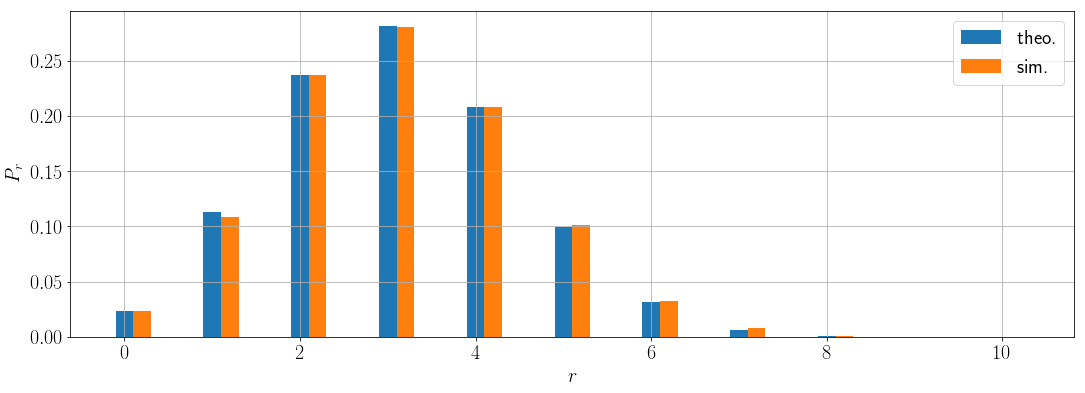

In [5]:
# plotting
plt.figure()
width = 0.2

plt.bar( r, Pr, linewidth=2.0, width=width, label='theo.')
plt.bar( r + width, hist[0], linewidth=2.0, width=width, label='sim.' )

plt.xlabel('$r$')
plt.ylabel('$P_r$')
plt.grid( True )
plt.legend( loc = 'upper right' )